In [316]:
import numpy as np
import pylab as pl
%matplotlib inline

In [317]:
dataset_folder = "../datasets/"

In [318]:
import sys
sys.path.insert(0, '../platemate/src/')
import platemate as pm

In [319]:
ColumnNames = {
    "Z10M" : "A",
    "Z5M"  : "B",
    "Z10A" : ["C1","C4"],
    "Z5A"  : ["C5","C12","D1","D12"],
    "Z10T" : ["E1","E4"],
    "Z5T"  : ["E5","E12","F1","F12"],
    "Z5S"  : ["G"]
    }

controlNames = {
    "cc1690"  : ["H1","H6"],
    "TAP"     : ["H7","H9"],
    "mCh" : ["H10","H12"]
    }


## Setting up PlateMate

In [320]:
reload(pm)
experiment = pm.PlateMate( colonyMap = ColumnNames, controlMap = controlNames )

Confirming that PlateMate is now aware of the colony names.

In [321]:
print experiment.getColonyNames()

['Z5S', 'Z10A', 'Z5T', 'Z10M', 'Z5A', 'Z10T', 'Z5M']


Finding the files to be read

In [322]:
experiment.findFiles("20161003 pJP22mcherry", extension = "xlsx", path = dataset_folder)
print experiment.FLlist

['../datasets/20161003 pJP22mcherry 01.xlsx'
 '../datasets/20161003 pJP22mcherry 02.xlsx'
 '../datasets/20161003 pJP22mcherry 03.xlsx']


## Reading channels

Reading mcherry channel:

In [323]:
experiment.readfromSpreadSheet("mCherry", 36)
experiment.FLdata["mCherry"]

,A00,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11
0,5906,4512,4368,5048,4359,4401,4593,5385,21265,4597,...,4384,4112,3809,4688,4655,3650,3925,28013,29253,29582
1,3787,2659,2625,3443,3499,3463,2965,2913,2970,4617,...,4019,5072,4472,2518,5684,5602,5116,14484,14418,15222
2,3529,3618,3294,3715,3618,3813,4163,4105,4290,3855,...,3448,5788,4834,3485,5926,4888,5125,19756,19817,19479


Reading the blue channel

In [324]:
experiment.readfromSpreadSheet("Blue", 74)
experiment.FLdata["Blue"]

,A00,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11
0,25386,20823,21310,23226,21077,23416,21139,22382,29034,22155,...,19825,19963,19279,19034,19933,20249,21203,31340,28922,29218
1,14906,11427,12442,18068,13824,12595,13698,14535,16830,20082,...,13341,20806,13916,10940,21808,23044,21977,19761,18990,18878
2,16824,17392,18923,20759,18056,18619,18373,18354,18461,20591,...,15584,21946,15539,13462,24543,23291,24765,25099,24867,24576


Reading the absorbance

In [325]:
experiment.readfromSpreadSheet("OD",106)
experiment.FLdata["OD"]

,A00,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11
0,0.1156,0.1004,0.0967,0.0961,0.0996,0.1148,0.1024,0.1016,0.1337,0.1071,...,0.1174,0.1153,0.1207,0.1234,0.0966,0.0939,0.0891,0.1011,0.0972,0.0985
1,0.4222,0.1800,0.2405,0.1133,0.2486,0.2406,0.2068,0.1723,0.1048,0.0936,...,0.1864,0.1574,0.1791,0.2360,0.1063,0.1027,0.0999,0.1369,0.1578,0.1180
2,0.1408,0.1132,0.1051,0.1080,0.1101,0.1145,0.1001,0.0999,0.0963,0.0920,...,0.1668,0.1269,0.1797,0.2060,0.0936,0.0926,0.0900,0.1996,0.1923,0.2061


Reading the chlorophyla channel

In [326]:
experiment.readfromSpreadSheet("Chloro", 144)
experiment.FLdata["Chloro"]

,A00,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11
0,455,482,362,416,346,530,644,152,416,265,...,862,109,971,583,9,9,9,217,230,226
1,1217,1054,400,880,632,371,440,430,457,200,...,1367,260,1686,1974,8,8,6,64,54,54
2,1215,1655,559,325,1111,594,575,380,347,210,...,2454,152,2708,4522,8,8,8,101,79,82


Now, let's use platemate API to access only the data from Z5S for each channel:

In [327]:
experiment.getFluorescence("Z5S","mCherry")

,G01,G02,G03,G04,G05,G06,G07,G08,G09
0,3906,5069,4531,4582,4111,4165,3917,4880,4346
1,3490,2942,4145,3420,4110,4821,4860,5352,6378
2,4737,4536,4729,3949,4679,4853,5345,5057,5287


In [328]:
experiment.getFluorescence("Z5A","mCherry")

,C05,C06,C07,C08,C09,C10,C11,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11
0,3949,3538,5852,4047,3053,3571,5200,6831,5012,4473,4293,4544,3984,5956,5035,3884,3481,4102
1,3003,2978,3006,3248,3400,3851,5504,4069,3976,2616,3789,4239,4041,5054,5329,3433,4078,3913
2,5039,4022,3592,3900,3405,5639,5273,5532,4518,3942,4098,5183,4447,6692,5454,4722,4219,4747


The OD of this colony:

In [329]:
experiment.getFluorescence("Z5A","OD")

,C05,C06,C07,C08,C09,C10,C11,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11
0,0.1146,0.1317,0.1548,0.1190,0.1106,0.1238,0.1416,0.1701,0.1317,0.1263,0.1335,0.1066,0.1314,0.1438,0.1265,0.0887,0.0870,0.0880
1,0.1657,0.2153,0.1863,0.1686,0.1717,0.1555,0.0875,0.1967,0.1811,0.1840,0.2532,0.1018,0.1620,0.2604,0.3518,0.0997,0.1093,0.1238
2,0.1332,0.1333,0.1489,0.1433,0.1226,0.1605,0.0961,0.1837,0.1438,0.1360,0.1508,0.0814,0.1195,0.2254,0.2414,0.0909,0.0975,0.1198


Let's normalize all data using the OD channel

In [330]:
experiment.normalizeAllFluorescence("mCherry","OD")
experiment.getFluorescence("Z5A","mCherry")

,C05,C06,C07,C08,C09,C10,C11,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11
0,34458.986952,26864.086224,37803.618107,34008.402578,27603.977774,28844.910672,36723.164392,40158.729337,38056.189981,35415.674967,32157.304606,42626.641069,30319.633773,41418.635464,39802.372929,43788.051347,40011.495404,46613.636616
1,18123.113678,13831.862919,16135.266169,19264.532236,19801.980110,24765.274147,62902.858214,20686.323645,21954.721637,14217.391277,14964.455298,41640.470630,24944.444371,19408.602357,15147.811484,34433.301139,37310.154697,31607.430820
2,37830.328996,30172.541689,24123.572505,27215.632140,27773.247094,35133.955316,54869.925716,30114.317595,31418.635834,28985.292542,27175.065484,63673.219018,37213.390272,29689.440887,22593.205975,51947.196743,43271.796459,39624.373499


## Quick plots:

Plotting the **normalized** fluorescences

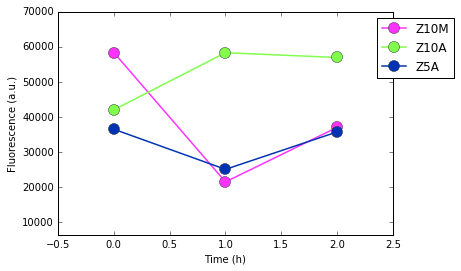

In [331]:
experiment.plotMean("mCherry", ["Z10M","Z10A","Z5A"])

pl.xlim(-0.5,2.5)
pl.legend( numpoints = 1, bbox_to_anchor = (1.2,1.0))

Let's look also at the standard deviation of these populations

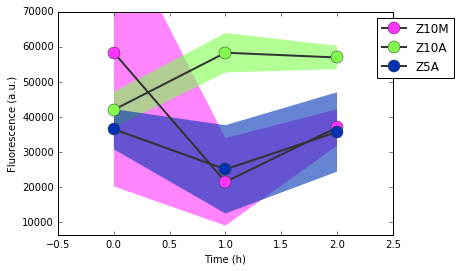

In [332]:
experiment.plotFuzzyMean("mCherry", ["Z10M","Z10A","Z5A"])

pl.xlim(-0.5,2.5)
pl.legend( numpoints = 1, bbox_to_anchor = (1.2,1.0))

(5000, 72000)

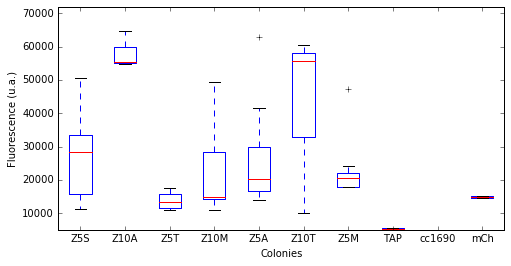

In [333]:
pl.figure( figsize=(8,4) )
experiment.snapshotBoxWhiskers("mCherry", 1, showControl = True)
pl.ylim(5000,72000)